In [60]:
import os
os.environ["PROJ_LIB"] ='Users\Sangwon Yi\anaconda3\share\proj'

In [61]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import PIL.Image as pilimg
from IPython.display import Image

from mpl_toolkits.basemap import Basemap

#한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 코로나19 누적 확진자 수 와 지역안전지수 연관성 분석

## 2021.01.07 코로나 확진자 통계자료 및 2019년 사회안전지수 통계자료 시각화
- 코로나 확진자 통계자료 출처: KOBIS
- 사회안전지수 출처: 행정안전부

In [108]:
corona = pd.read_csv('C:\\Users\\Sangwon Yi\\data/코로나_19_발생현황.csv', encoding='cp949')
safety = pd.read_csv('C:\\Users\\Sangwon Yi\\data/사회안전지수.csv', encoding='cp949')

display(corona)
display(safety)

# 코로나 확진자 통계자료 시각화를 위해 지역별 누적 확진자 자료로 수정
corona.rename(columns={'Unnamed: 0': '시도'}, inplace=True)
corona = corona[['시도', '누적확진']]
display(corona)


,Unnamed: 0,국내발생,해외유입,신규확진,누적확진,격리증감,격리누적,신규격리해제,누적격리해제,신규사망,누적사망
0,서울,292,6,298,20899,177,8143,114,12543,6,213
1,부산,23,0,23,2083,-4,497,26,1522,1,64
2,대구,10,0,10,7987,-8,345,17,7439,0,203
3,인천,37,4,41,3254,-64,808,104,2412,1,34
4,광주,28,0,28,1292,4,325,23,959,1,8
5,대전,9,0,9,900,5,140,4,753,0,7
6,울산,9,0,9,760,1,196,7,532,1,32
7,세종,3,0,3,158,0,21,3,136,0,1
8,경기,294,9,303,16250,138,4243,157,11695,8,312
9,강원,30,0,30,1402,3,354,27,1031,0,17


,시도,교통사고,화제,범죄,생활안전,자살,감염병
0,서울,1,2,5,2,1,4
1,부산,2,2,4,1,5,4
2,대구,3,4,2,2,4,5
3,인천,2,3,3,4,3,2
4,광주,3,1,3,3,2,1
5,대전,4,4,4,4,4,3
6,울산,4,3,2,3,3,3
7,세종,5,5,1,5,2,2
8,경기,1,1,4,1,1,1
9,강원,3,3,3,4,4,5


,시도,누적확진
0,서울,20899
1,부산,2083
2,대구,7987
3,인천,3254
4,광주,1292
5,대전,900
6,울산,760
7,세종,158
8,경기,16250
9,강원,1402


## 사회안전지수와 코로나 누적확진자 수 비교 시각화

1) 누적확진자수와 각 항목의 상관계수   
교통사고: -0.64, 화제: -0.41, 범죄: 0.41, 생활안전: -0.51, 자살: -0.51, 감염병: 0.04 로 표시된다 

2) 분석  
사회안전지수는 낮을수록 긍정적이고 높을수록 부정적이다.(1등급이 최고점)  
따라서 상관계수가 양수인 것은 해당 사회안전지수 항목이 부정적일수록(클수록) 확진자수가 많다는 것을 의미하고  
음수인 것은 사회안전지수 항목이 부정적일수록(클수록) 확진자수가 적다는 것을 의미한다.

3) 결론  
상관계수의 절대값이 0.5이상인 교통사고, 생활안전, 자살 항목중 특히 -0.64인 교통사고 항목을 보면
교통사고 항목이 긍정적일수록(작을수록) 확진자수가 많다.  

상관계수 값이 유일하게 양수인 범죄 항목을 보면(0.41)
범죄 항목이 부정적일수록 확진자수가 많다.  
    
의외의 결과로서 감염병지수는 코로나 확진자수와 무관한 것을 볼 수 있다.  
이것은 감염병지수가 코로나외 다른 전염병에 대한 항목이므로 보통 위생이 좋지않은 지역에서 많이 발생하였는데   
코로나 바이러스는 감염성이 극히 높아 지역 자체의 위생과는 연관성이 크지 않은것으로 보인다

범죄 항목이 부정적이고 교통사고 항목이 긍정적인 지역은 수도권 및 인구밀집 지역과 유동인구가 많은 지역이다.
따라서 코로나 확진자수와 연관깊은 요소는 인구밀집과 유동인구이다.

,시도,누적확진,교통사고,화제,범죄,생활안전,자살,감염병
0,서울,20899,1,2,5,2,1,4
1,부산,2083,2,2,4,1,5,4
2,대구,7987,3,4,2,2,4,5
3,인천,3254,2,3,3,4,3,2
4,광주,1292,3,1,3,3,2,1
5,대전,900,4,4,4,4,4,3
6,울산,760,4,3,2,3,3,3
7,세종,158,5,5,1,5,2,2
8,경기,16250,1,1,4,1,1,1
9,강원,1402,3,3,3,4,4,5


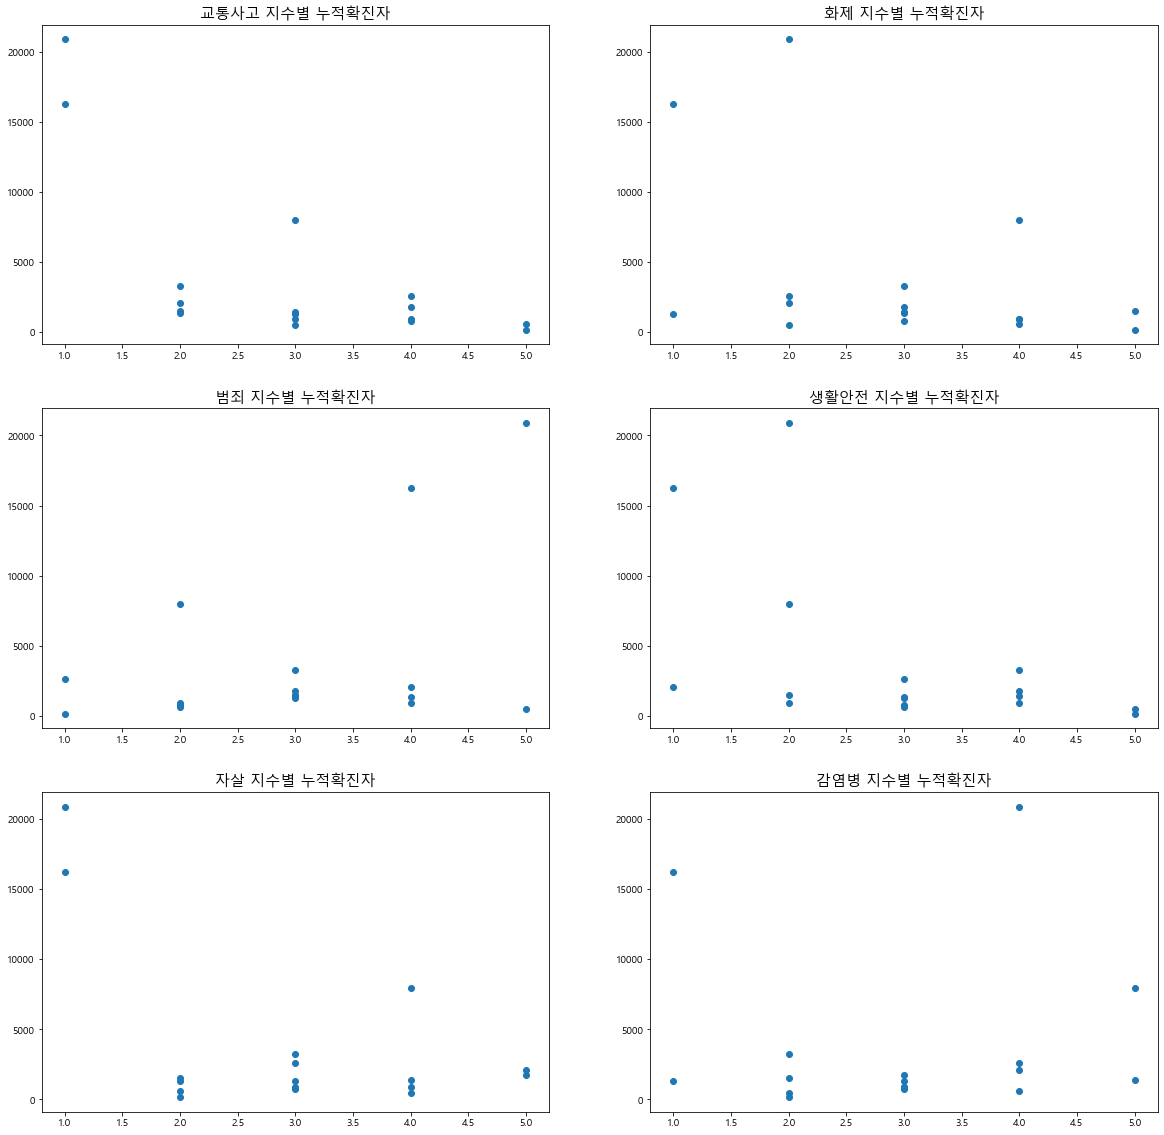

상관계수 확인
           누적확진      교통사고        화제        범죄      생활안전        자살       감염병
누적확진  1.000000 -0.647823 -0.409729  0.411043 -0.513304 -0.513382  0.038680
교통사고 -0.647823  1.000000  0.458333 -0.666667  0.583333  0.250000  0.166667
화제   -0.409729  0.458333  1.000000 -0.458333  0.250000  0.083333  0.208333
범죄    0.411043 -0.666667 -0.458333  1.000000 -0.125000  0.041667 -0.166667
생활안전 -0.513304  0.583333  0.250000 -0.125000  1.000000  0.250000 -0.125000
자살   -0.513382  0.250000  0.083333  0.041667  0.250000  1.000000  0.416667
감염병   0.038680  0.166667  0.208333 -0.166667 -0.125000  0.416667  1.000000


In [104]:
# 데이터시각화를 위해 코로나, 안전지수 통계를 '시도'를 기준으로 열단위로 결합
df1 = pd.merge(corona, safety, on=['시도'])
display(df1)

plt.figure(figsize=(20, 20))
plt.subplot(321)
plt.scatter(df1["교통사고"], df1["누적확진"])
plt.title('교통사고 지수별 누적확진자', fontsize=15)

plt.subplot(322)
plt.scatter(df1["화제"], df1["누적확진"])
plt.title('화제 지수별 누적확진자', fontsize=15)

plt.subplot(323)
plt.scatter(df1["범죄"], df1["누적확진"])
plt.title('범죄 지수별 누적확진자', fontsize=15)

plt.subplot(324)
plt.scatter(df1["생활안전"], df1["누적확진"])
plt.title('생활안전 지수별 누적확진자', fontsize=15)

plt.subplot(325)
plt.scatter(df1["자살"], df1["누적확진"])
plt.title('자살 지수별 누적확진자', fontsize=15)

plt.subplot(326)
plt.scatter(df1["감염병"], df1["누적확진"])
plt.title('감염병 지수별 누적확진자', fontsize=15)

plt.show()

print("상관계수 확인\n", df1.corr())


## 각 항목별 코로나 누적확진자수에 대한 영향력 분석  
1) 코로나 누적확진자수에 대한 영향력을 %로 변환하여 보면  
교통사고: 25%, 자살: 20%, 생활안전: 20%, 범죄: 16%, 화제: 16%, 감염병: 1% 이다  
  
2) 결론  
코로나 누적확진자수에 가장 큰 영향을 주는 요소는 교통사고가 1위이고  
2위: 자살&생활안전, 3위: 범죄&화제, 4위: 감염병 이다


,누적확진,교통사고,화제,범죄,생활안전,자살,감염병
교통사고,0.647823,1.000000,0.458333,0.666667,0.583333,0.250000,0.166667
자살,0.513382,0.250000,0.083333,0.041667,0.250000,1.000000,0.416667
생활안전,0.513304,0.583333,0.250000,0.125000,1.000000,0.250000,0.125000
범죄,0.411043,0.666667,0.458333,1.000000,0.125000,0.041667,0.166667
화제,0.409729,0.458333,1.000000,0.458333,0.250000,0.083333,0.208333
감염병,0.038680,0.166667,0.208333,0.166667,0.125000,0.416667,1.000000


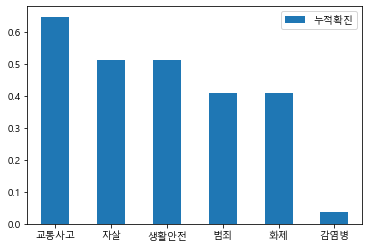

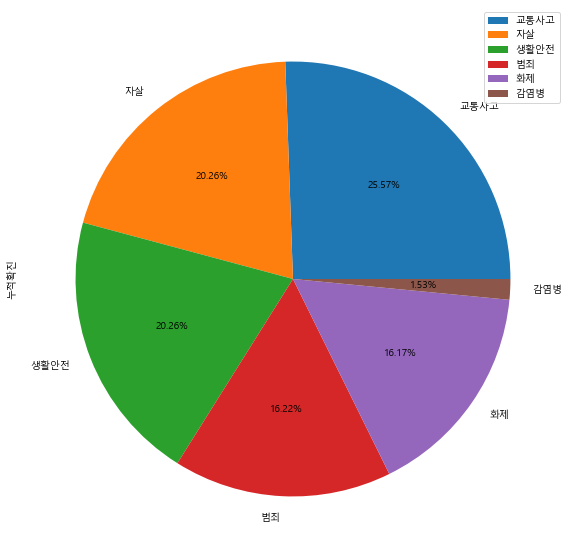

In [123]:
# 각 항목별 상관계수를 데이터로 사용
num = df1.corr()
num.drop(['누적확진'], inplace = True)


# 상관계수의 영향력을 비교할 목적이므로 절댓값으로 변환
num = num.abs()

# 크기비교를 쉽게하기 위해 내림차순으로 정렬
num = num.sort_values(by=['누적확진'], ascending=False)
display(num)

#막대그래프
num.plot.bar(y=['누적확진'], rot=0)
plt.show()

# 파이 그래프
num.plot.pie(y='누적확진', autopct = '%.2f%%', figsize=(10, 10))
plt.show()